# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [68]:
import random
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('data/planar_flower.csv')
data = np.array(data)
data

array([[ 1.00000000e+00, -1.03553187e+00, -9.12076121e-01,
         0.00000000e+00],
       [ 2.00000000e+00,  1.44089627e+00, -8.01500713e-01,
         0.00000000e+00],
       [ 3.00000000e+00,  2.07581326e+00, -1.58340048e-01,
         0.00000000e+00],
       ...,
       [ 3.98000000e+02,  3.12458195e+00, -2.20001931e+00,
         1.00000000e+00],
       [ 3.99000000e+02,  2.50743904e+00, -8.77076546e-01,
         1.00000000e+00],
       [ 4.00000000e+02,  2.35194486e+00, -9.27350687e-01,
         1.00000000e+00]])

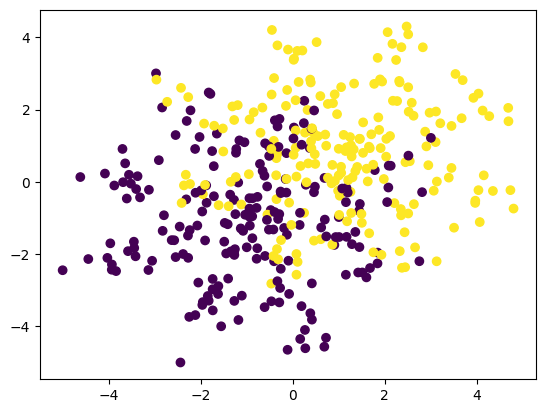

In [77]:
data_x = data[:, 1:3]
data_y = data[:, 3].reshape(data.shape[0], 1)
n = data_x.shape[0]

train_test_split = int(0.8 * n)
train_x = data_x[:train_test_split, :]
train_y = data_y[:train_test_split]

test_x = data_x[train_test_split:, :]
test_y = data_y[train_test_split:]

# data_x
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y)

In [83]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z)) 



class Network:
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(i, 1) for i in sizes[1:]]
        # initialize n by m weight matrices where n = size of ith layer, n = size of i+0th layer
        # NOTE: flip zip to avoid transposing?
        self.weights = [np.random.randn(i, j).T for i, j in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        a = np.array(a).reshape(self.sizes[0], 1)
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    #TODO feed both x AND y
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        if test_data != None:
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            time1 = time.time()
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            # for mini_batch in mini_batches:
            #     self.update_mini_batch(mini_batch, eta)
            # time2 = time.time()
            # if test_data != None:
            #     print(f"Epoch {j+1}: {self.evaleu}")
            
    def update_mini_batch(self, mini_batch, eta):
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x,y)
        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        activation = x
        activations = [x] # stores sigmoid(zs)
        zs = [x]
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation) + b # NOTE check if Transpose used
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp 
            nabla_b[-l] = delta
            print(activations[-l-1])
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
            
        return nabla_b, nabla_w

    
    def cost_derivative(self, output_activations, y):
        return output_activations - y
        

# class Layer:
#     def __init__(self, num_nodes, activation=None):
#         self.num_nodes = num_nodes
#         self.activation = activation
# 
# class Node:
#     def __init__(self, activation=None):
#         self.weights = np.random.randn
#         
# class activation:
#     def __init__(self):
#         pass

In [84]:
network = Network([2, 3, 4, 1])

In [85]:
for x in data_x[:10]:
    print(network.feedforward(x))

[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]
[[0.35671393]]


In [88]:
network.SGD(data_x, 30, 10, 3.0)

In [90]:
network.backprop(data_x[1], data_y[1])

[[0.07624555 0.69864279 0.39711821]
 [0.07289763 0.68832982 0.38556158]
 [0.12306224 0.79763607 0.52828336]]
[-1.03553187 -0.91207612]


ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)